In [1]:
import os
os.getcwd()

'F:\\All Semister\\8A\\Neural Network\\Lab'

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("heart failure.csv")    # data loading
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.shape   # total object/sample or row = 299 and features/columns = 13

(299, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.isnull().sum()    # missing value checking

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
df = df.rename({"DEATH_EVENT":"death"}, axis=1)

In [8]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [9]:
df.death.value_counts()

0    203
1     96
Name: death, dtype: int64

# Data visualization

In [10]:
import seaborn as sns

<AxesSubplot:xlabel='death', ylabel='count'>

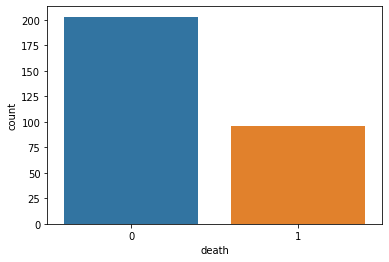

In [11]:
sns.countplot(x="death", data=df)  

### death analysis with respect to diabetes

<AxesSubplot:xlabel='diabetes', ylabel='count'>

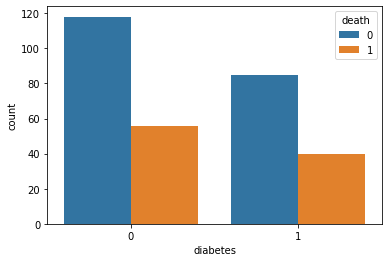

In [12]:
sns.countplot(x="diabetes", data=df, hue="death")

In [13]:
df.diabetes.value_counts()

0    174
1    125
Name: diabetes, dtype: int64

### death analysis with respect to anaemia

<AxesSubplot:xlabel='anaemia', ylabel='count'>

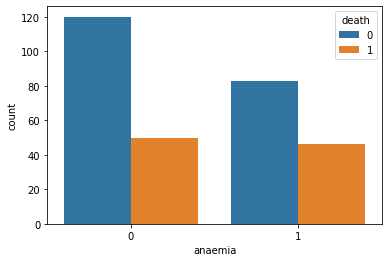

In [14]:
sns.countplot(x="anaemia", data=df, hue="death")

In [15]:
df.anaemia.value_counts()

0    170
1    129
Name: anaemia, dtype: int64

### death analysis with respect to high_blood_pressure

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

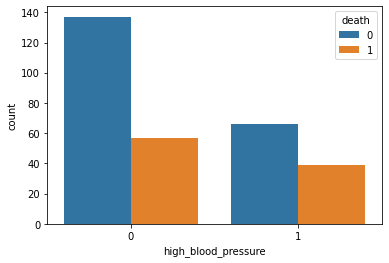

In [16]:
sns.countplot(x="high_blood_pressure", data=df, hue="death")

In [17]:
df.high_blood_pressure.value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

### high_blood_pressure analysis with respect to diabetes

<AxesSubplot:xlabel='diabetes', ylabel='count'>

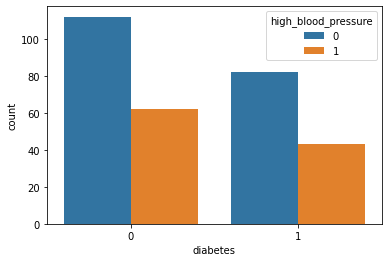

In [18]:
sns.countplot(x="diabetes", data=df, hue="high_blood_pressure")

### Correlation analysis

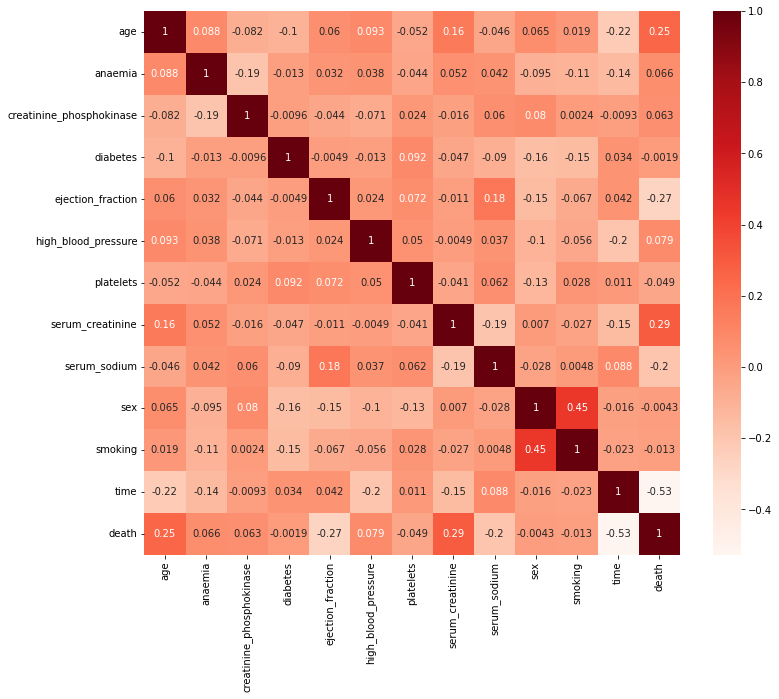

In [19]:
import matplotlib.pyplot as plt
from matplotlib import cm          # Choosing Colormaps

plt.figure(figsize=(12, 10))
sns.heatmap( df.corr(), annot=True, cmap=plt.cm.Reds)    # for correlation measure and drow
plt.show()

In [ ]:
# from above correlation's graphical view, smoking and sex are max correlated among them-self. 
# But, we think, this correlation is not enough to drop a column ( smoking or sex ).

# Feature scaling

In [20]:
 from sklearn.preprocessing import MinMaxScaler    # normalization scaling technique

In [21]:
normalization = MinMaxScaler()

In [22]:
df["age"] = normalization.fit_transform(df[["age"]])
df["creatinine_phosphokinase"] = normalization.fit_transform(df[["creatinine_phosphokinase"]])
df["ejection_fraction"] = normalization.fit_transform(df[["ejection_fraction"]])
df["platelets"] = normalization.fit_transform(df[["platelets"]])
df["serum_sodium"] = normalization.fit_transform(df[["serum_sodium"]]) 
df["time"] = normalization.fit_transform(df[["time"]])

In [23]:
df.sample(5)    # randomly 5 sample calling

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
294,0.400000,0,0.004848,1,0.363636,1,0.157474,1.1,0.857143,1,1,0.946619,0
140,0.727273,0,0.099770,0,0.363636,0,0.288833,1.1,0.600000,1,0,0.373665,1
97,0.545455,1,0.004593,0,0.696970,0,0.278700,1.1,0.657143,0,0,0.288256,0
76,0.545455,0,0.008803,0,0.696970,1,0.353861,0.8,0.771429,0,1,0.249110,0
125,0.054545,1,0.042740,0,0.545455,0,0.256880,1.3,0.628571,0,0,0.330961,0


# split data into x(independent value) and y(dependent or target value)

In [24]:
x = df.drop("death", axis=1)     # feature columns / data

In [25]:
y = df["death"]    # target column / data

In [26]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: death, dtype: int64

In [27]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,0.636364,0,0.071319,0,0.090909,1,0.290823,1.9,0.485714,1,0,0.000000
1,0.272727,0,1.000000,0,0.363636,0,0.288833,1.1,0.657143,1,0,0.007117
2,0.454545,0,0.015693,0,0.090909,0,0.165960,1.3,0.457143,1,1,0.010676
3,0.181818,1,0.011227,0,0.090909,0,0.224148,1.9,0.685714,1,0,0.010676
4,0.454545,1,0.017479,1,0.090909,0,0.365984,2.7,0.085714,0,0,0.014235


# split data according to traning and testing dataset

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=.70, random_state=42)  # training data: 70% & testing: 30%

In [30]:
print(f"xtrain: {xtrain.shape}, xtest: {xtest.shape} \nytrain: {ytrain.shape},  ytest: {ytest.shape}")

xtrain: (209, 12), xtest: (90, 12) 
ytrain: (209,),  ytest: (90,)


# apply Neural network, multi-layer perceptron classification

In [31]:
from sklearn.neural_network import MLPClassifier

In [32]:
clf = MLPClassifier(max_iter=500, solver='adam', random_state=1)

In [33]:
clf.fit(xtrain, ytrain)  # train the model with 70% of data

MLPClassifier(max_iter=500, random_state=1)

In [34]:
pred = clf.predict(xtest)   # predict corresponding y values

In [35]:
pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0], dtype=int64)

In [36]:
import numpy as np
np.array(ytest)     # actual y values

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0], dtype=int64)

# Evaluation of the model

In [37]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, RocCurveDisplay, ConfusionMatrixDisplay

In [38]:
accuracy_score(ytest, pred)  # overall model's accuracy

0.7555555555555555

In [39]:
print( classification_report(ytest, pred) )

              precision    recall  f1-score   support

           0       0.75      0.89      0.81        53
           1       0.78      0.57      0.66        37

    accuracy                           0.76        90
   macro avg       0.76      0.73      0.73        90
weighted avg       0.76      0.76      0.75        90



In [40]:
# by analyzing the confusion matrix, we can know actually what is going on. For example - precision, recall etc

test_confusion_matrix = confusion_matrix(ytest, pred)
test_confusion_matrix

array([[47,  6],
       [16, 21]], dtype=int64)

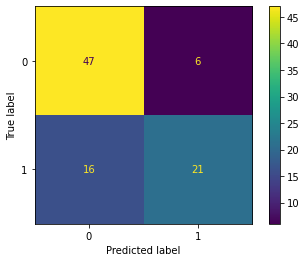

In [41]:
ConfusionMatrixDisplay.from_estimator(clf, xtest, ytest)    # graphical view of confusion matrix
plt.show()

In [42]:
confusion_matrix(ytest, pred).reshape(-1)   # convert into one dimentional array

array([47,  6, 16, 21], dtype=int64)

In [43]:
tn, fp, fn, tp = confusion_matrix(ytest, pred).reshape(-1)   # multi-variable assign at a same time of confusion matrix

print(f"True Negative: {tp},   False Positive: {fp}, \nFalse Negative: {fn},   True Positive: {tn}")

True Negative: 21,   False Positive: 6, 
False Negative: 16,   True Positive: 47


### compare precision and recall with classification_report

In [44]:
# Precision of 0, 0 mean's not death; Negeative prediction value
precision_of_0 = (tn) / (tn+fn)
precision_of_0

0.746031746031746

In [45]:
# Precision of 1, 1 mean's death; Positive prediction value
precision_of_1 = (tp) / (tp+fp)
precision_of_1

0.7777777777777778

In [46]:
# recall of 0, 0 mean's not death; true negative rate
recall_of_0 = (tn) / (tn+fp)
recall_of_0

0.8867924528301887

In [47]:
# recall of 1, 1 mean's death; true positive rate
recall_of_1 = (tp) / (tp+fn)
recall_of_1

0.5675675675675675

### ROC curve

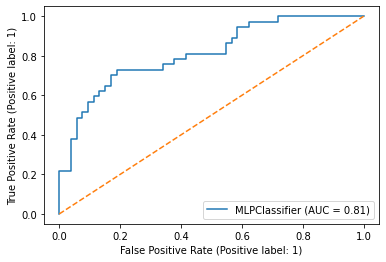

In [48]:
# Receiver Operating Characteristic
# The heigher the AUC(Area under the curve), the better the performance of the model 

RocCurveDisplay.from_estimator(clf, xtest, ytest)
plt.plot([0,1],[0,1],linestyle='dashed')
plt.show()

In [ ]:
# From this curve AUC is 0.81, so our model's performance is excellent. [ 0.80 to 0.90 range is called excellent ]
# But to considering overall accuracy, precision and recall, we can say that, 
# for this dataset and using multi-layer perceptron, this model is acceptable. [ 0.70 to 0.80 range is called acceptable ]